In [1]:
import io
import json
import PyPDF2
import re
import requests
import time
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [2]:
url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2020/09/12ata-r.e.-virtual-setembro-10-09-2020.pdf"

In [3]:
resposta =  requests.get(url)


In [4]:
with io.BytesIO(resposta.content) as abrir_pdf:
    ler_pdf = PyPDF2.PdfFileReader(abrir_pdf)
    number = ler_pdf.numPages
    text= ''
    for i in range(number):
        pagina= ler_pdf.getPage(i)
        text += pagina.extractText()

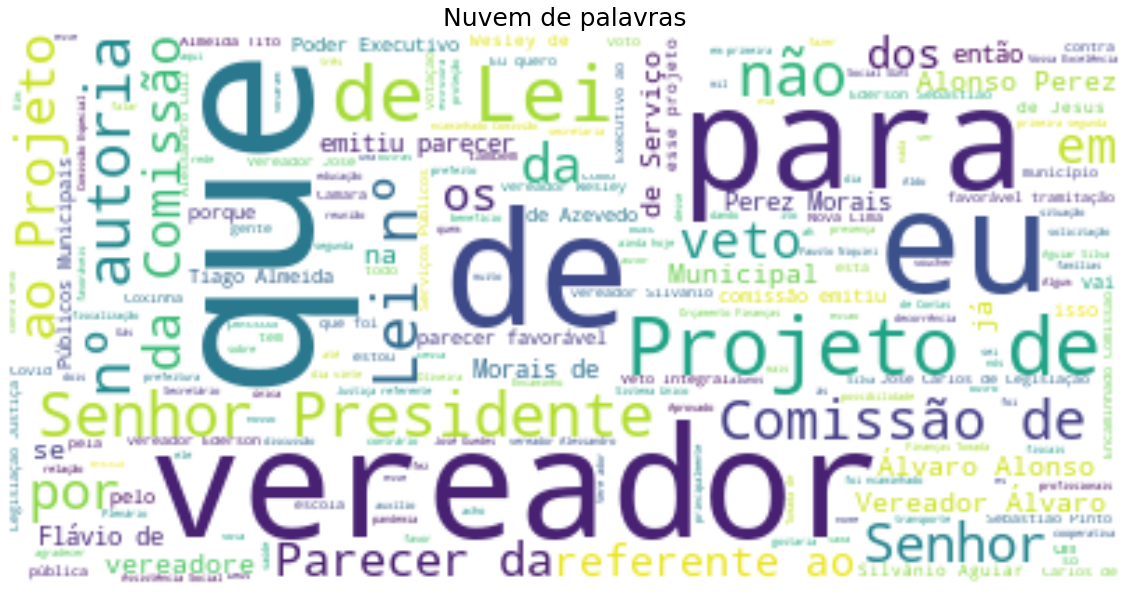

In [5]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 500, max_font_size=70).generate(str(data))
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(text,  'Nuvem de palavras')

In [6]:
text = text.rstrip().replace('\n', '').lower()

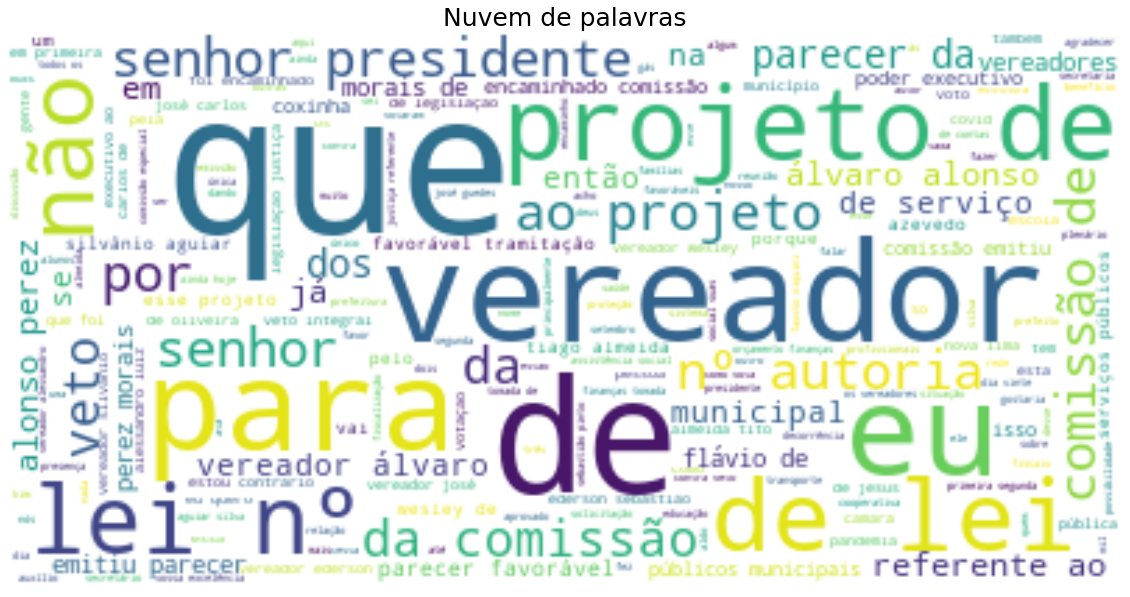

In [7]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 500, max_font_size=70).generate(str(data))
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(text,  'Nuvem de palavras')

In [8]:
#word_tokenize(text)

In [9]:
#capword_tokenizer = RegexpTokenizer('nova lima','wesley  de  jesus  silva')
#capword_tokenizer.tokenize(text)

In [10]:
tokens = word_tokenize(text)

pontuacao = ['(',')',';',':','[',']',',','-','?','nº','s',]

stop_words = set(stopwords.words('portuguese'))

stop_words_custom = ['vereador', 'vereadores', 2020, '2020', 'álvaro','alonso', 
                     'perez','morais ','azevedo', 'coxinha',
                     'álvaro alonso perez morais de azevedo', 'morais','azevedo',
                     'josé  carlos  de  oliveira','josé',  'carlos',  'oliveira',
                     'flávio de almeida', 'flávio','almeida',
                     'silvânio aguiar silva',
                    'silvânio', 'aguiar', 'silva',
                    'wesley  de  jesus  silva','wesley', 'jesus']

In [11]:
print(stop_words)

{'minhas', 'tuas', 'teu', 'tu', 'sou', 'depois', 'dele', 'dela', 'pelas', 'essas', 'estivemos', 'como', 'houveriam', 'fomos', 'tivera', 'formos', 'esse', 'nossas', 'este', 'você', 'pelo', 'houverem', 'houverei', 'sejamos', 'nas', 'seremos', 'houverá', 'isto', 'estamos', 'estão', 'um', 'também', 'à', 'já', 'ela', 'vocês', 'estivermos', 'estivéramos', 'estiveram', 'só', 'mesmo', 'esteve', 'teus', 'haja', 'com', 'fui', 'estivesse', 'dos', 'hei', 'a', 'teríamos', 'houverão', 'ou', 'mas', 'não', 'eu', 'meu', 'minha', 'ao', 'serão', 'tínhamos', 'tém', 'eles', 'elas', 'nossa', 'pela', 'isso', 'houvessem', 'nem', 'fosse', 'hajam', 'me', 'que', 'era', 'num', 'éramos', 'tiveram', 'tenhamos', 'tivemos', 'fôssemos', 'houveremos', 'lhe', 'tiverem', 'teremos', 'forem', 'de', 'tenho', 'terá', 'quem', 'vos', 'estiver', 'sua', 'houveríamos', 'terão', 'e', 'tenham', 'até', 'nosso', 'quando', 'tua', 'estava', 'houveram', 'eram', 'houvesse', 'serei', 'estejam', 'teria', 'o', 'tivessem', 'nos', 'hajamos', 

In [12]:
resultado1 = [resultado for resultado in tokens if resultado not in stop_words]

In [13]:
print(len(resultado1))

2492


In [14]:
resultado2 = [resultado1 for resultado1 in resultado1 if resultado1 not in pontuacao]

In [15]:
print(len(resultado2))

2140


In [16]:
resultado3 = [resultado2 for resultado2 in resultado2 if resultado2 not in stop_words_custom]

In [17]:
print(len(resultado3))

1845


In [18]:
#print(resultado)

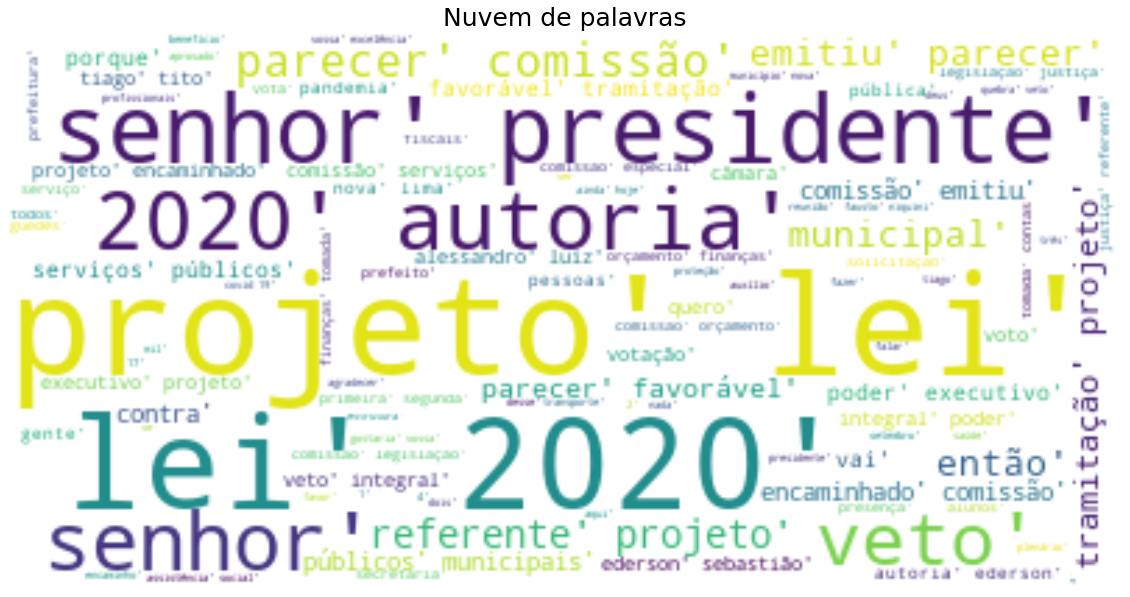

In [19]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 100, max_font_size=70).generate(str(data))
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(resultado3,  'Nuvem de palavras')